In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pickle
from sklearn import metrics

In [2]:
train = pd.read_csv("data/burnout_train.csv")
test = pd.read_csv("data/burnout_test.csv")

In [3]:
train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [4]:
# Drop NA values

train = train.dropna()
train.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [5]:
train_2 = train.copy()

In [6]:
train_2['Gender'] = train_2['Gender'].map({'Male': 0, 'Female': 1})
train_2['Company Type'] = train_2['Company Type'].map({'Product': 0, 'Service': 1})
train_2['WFH Setup Available'] = train_2['WFH Setup Available'].map({'No': 0, 'Yes': 1})

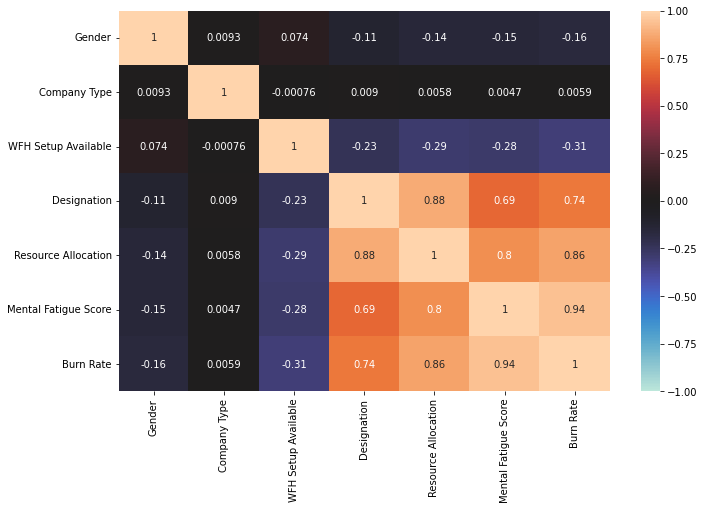

In [7]:
# Plot correlation heatmap

plt.figure(figsize=(11,7))
corr = train_2.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [8]:
# Drop columns that have low (+ve/-ve) correlation with Burn Rate + variables such as Date of Joining and Employee ID

to_drop = ['Employee ID', 'Date of Joining', 'Company Type']
train_3 = train_2.drop(to_drop, axis=1)

In [9]:
X, y = np.array(train_3.drop("Burn Rate", axis=1)), np.array(train_3['Burn Rate'])

In [10]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [11]:
# Train and test Linear Regression model

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Metrics
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('RMSE:', metrics.mean_squared_error(y_test, lr_pred))
print('R2:', metrics.r2_score(y_test, lr_pred))

MAE: 0.04565426645543035
RMSE: 0.003115706213502445
R2: 0.9203715105461743


In [12]:
# Train and test XGBoost Regressor model

xg_regressor = xgb.XGBRegressor()

xg_regressor.fit(X_train, y_train)

xgb_pred = xg_regressor.predict(X_test)

# Metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('RMSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('R2:', metrics.r2_score(y_test, xgb_pred))

MAE: 0.04354162369950334
RMSE: 0.0029247060541963805
R2: 0.9252529252652741


In [13]:
# Save models (saved using txt cause lesser space occupied)

# lr_filename = "models/burnout/lr.txt"
# pickle.dump(lr, open(lr_filename, "wb"))
# xg_regressor.save_model("models/burnout/xgb.txt")

In [2]:
# Load models

# lr = pickle.load(open(lr_filename, "rb"))
xg_regressor = xgb.XGBRegressor()
xg_regressor.load_model("models/burnout/xgb.txt")

In [3]:
# Test one data point in order of: Gender (0-male, 1-female), WFH Setup (0-no, 1-yes), Designation ([0-5] The bigger, the higher the designation)
# Resource allocation ([0-10] Amount of resources allocated, higher means more), Mental Fatigue ([0.0-10.0] Level of employee's fatigue)

test = np.array([[1, 0, 2, 3, 3.8]])
pred = xg_regressor.predict(test)
pred[0] # Employee at low risk of burnout

0.2366139